In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import xgboost as xgb 
import lightgbm as lgb

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
pd.set_option('display.max_columns', 500)

In [41]:
data = pd.read_csv('medicare-skilled-nursing-facility-snf-provider-aggregate-report-cy-2015.csv')
data.head()

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,95,85,13.9,3787309,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,20,19,10.6,436623,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,164,144,15.4,5906115,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,124,110,16.0,2748027,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,90,85,17.4,1679414,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15026 entries, 0 to 15025
Data columns (total 41 columns):
Provider ID                                             15026 non-null int64
Facility Name                                           15026 non-null object
Street Address                                          15026 non-null object
City                                                    15026 non-null object
State                                                   15026 non-null object
Zip Code                                                15026 non-null int64
Total Stays                                             15026 non-null int64
Distinct Beneficiaries Per Provider                     15026 non-null int64
Average Length of Stay (Days)                           15026 non-null float64
Total SNF Charge Amount                                 15026 non-null int64
Total SNF Medicare Allowed Amount                       15026 non-null int64
Total SNF Medicare Payment Amount     

In [43]:
#drop object column
data.drop(data.select_dtypes(['object']), inplace=True, axis=1)
#drop not important column
data.drop(['Provider ID', 'Zip Code' ],inplace=True, axis=1)

In [44]:
data.head()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,95,85,13.9,3787309,536155,514893,645028,78,32.0,53.0,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,20,19,10.6,436623,75762,75762,94249,82,NaN,NaN,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,164,144,15.4,5906115,946310,913116,1142756,77,46.0,98.0,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,124,110,16.0,2748027,828039,807406,1006830,79,38.0,72.0,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,90,85,17.4,1679414,656639,604009,713803,76,35.0,50.0,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


count    15026.000000
mean         2.459436
std          0.607989
min          0.600000
25%          2.050000
50%          2.360000
75%          2.760000
max          8.630000
Name: Average HCC Score, dtype: float64


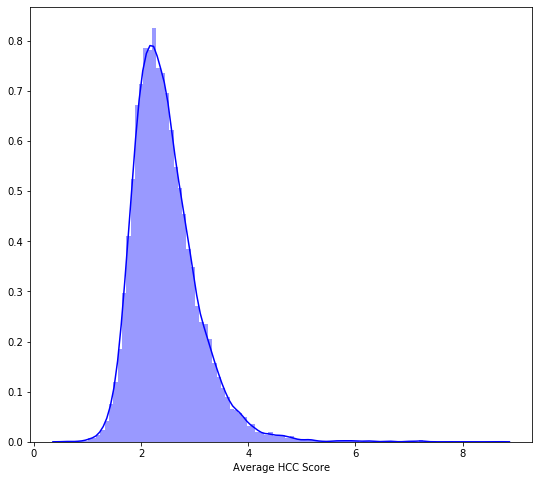

In [7]:
print(data['Average HCC Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Average HCC Score'], color='b', bins=100, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21aa8550>,
      dtype=object)

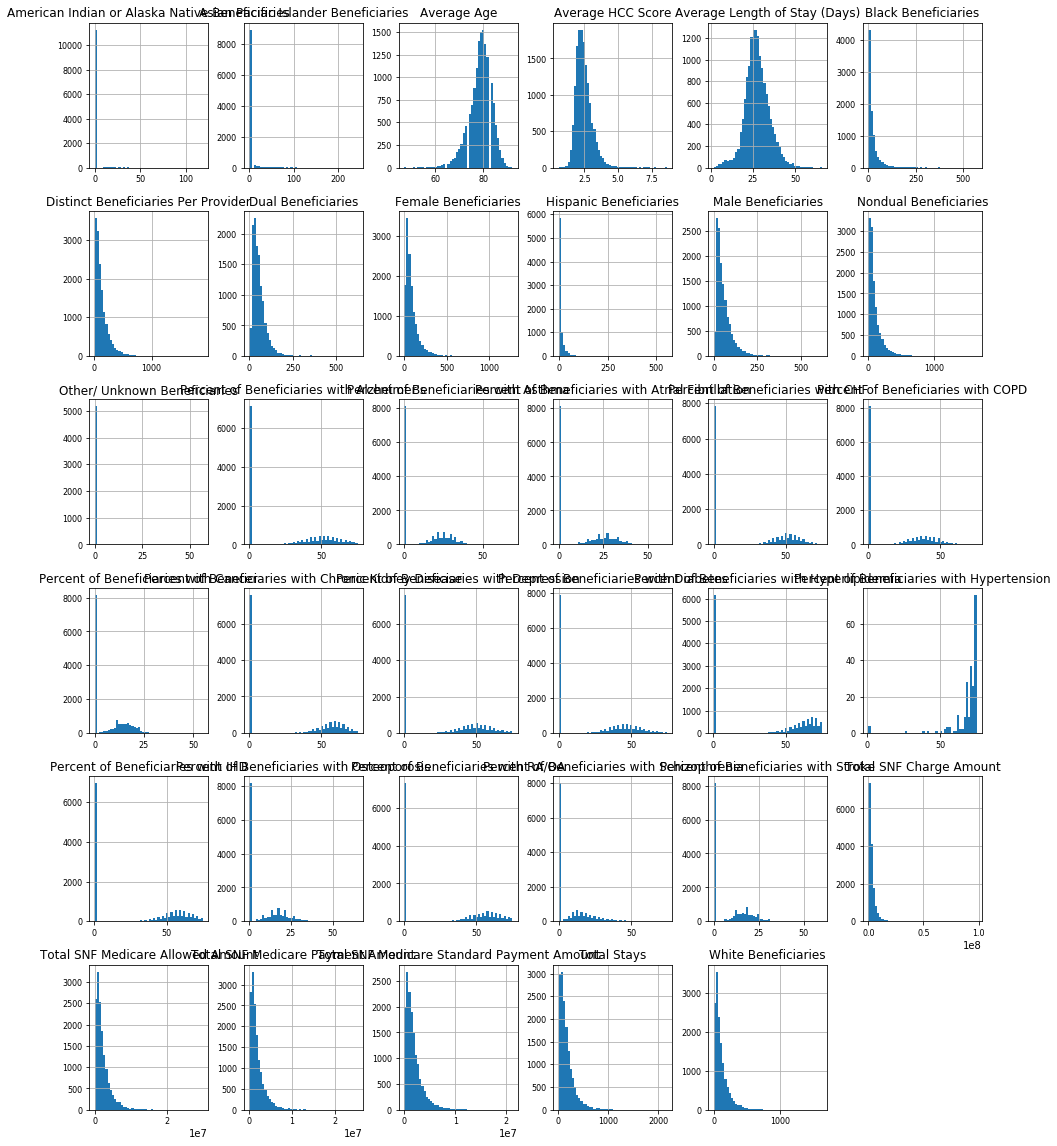

In [8]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [9]:
data_corr = data.corr()['Average HCC Score'][:-1] # -1 because the latest row is SalePrice
golden_features_list = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)
golden_features_list

Average HCC Score    1.000000
Average Age         -0.569349
Name: Average HCC Score, dtype: float64

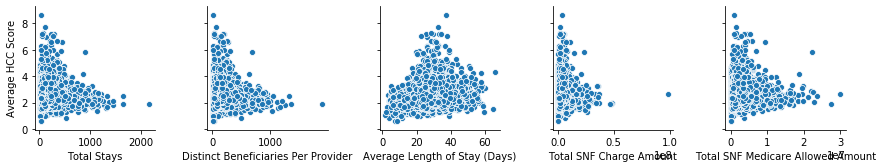

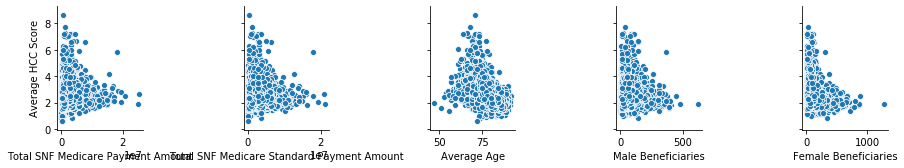

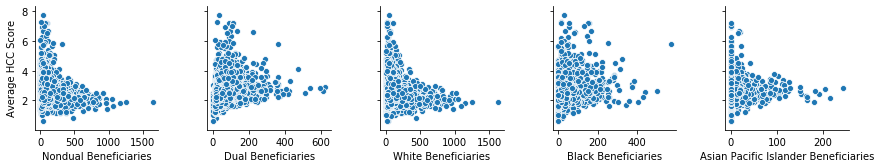

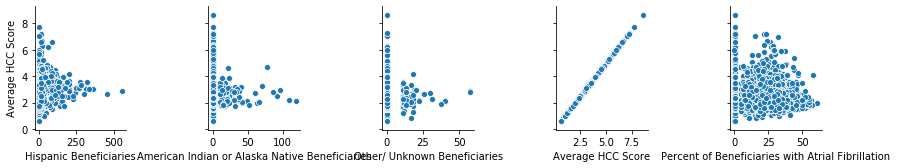

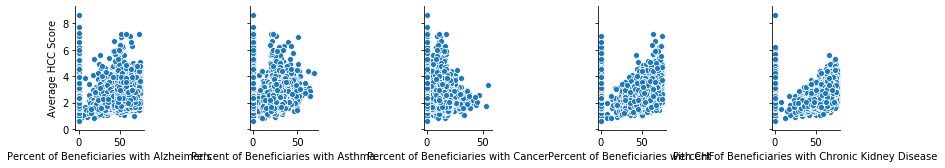

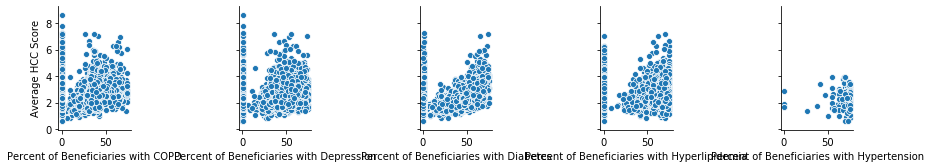

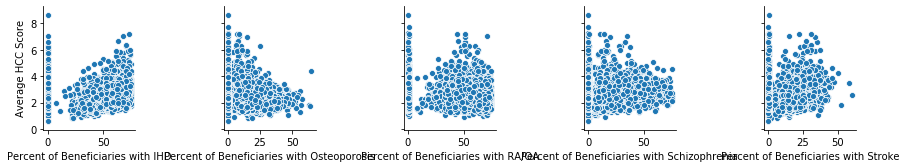

In [10]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data,
                x_vars=data.columns[i:i+5],
                y_vars=['Average HCC Score'])

In [45]:
label=[]
for i in range(len(data)):
    if data['Average HCC Score'][i]>3:
        label.append(1)
    else:
        label.append(0)
data['label']=label


In [46]:
data.drop(['Average HCC Score'], inplace=True, axis=1)

In [47]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [48]:
data.head()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,...,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,label
0,95,85,13.9,3787309,536155,514893,645028,78,32.0,53.0,...,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0,0
1,20,19,10.6,436623,75762,75762,94249,82,NaN,NaN,...,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0,0
2,164,144,15.4,5906115,946310,913116,1142756,77,46.0,98.0,...,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0,0
3,124,110,16.0,2748027,828039,807406,1006830,79,38.0,72.0,...,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0,0
4,90,85,17.4,1679414,656639,604009,713803,76,35.0,50.0,...,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0,0


Number of low risk:  12715
Number of high risk :  2311


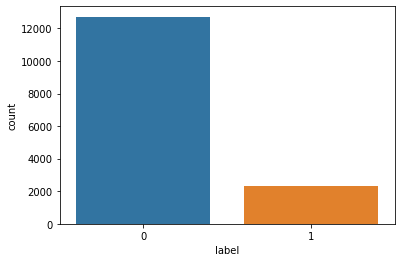

In [17]:
ax = sns.countplot(data.label,label="Count")       # M = 212, B = 357
low_risk, high_risk = data.label.value_counts()
print('Number of low risk: ',low_risk)
print('Number of high risk : ',high_risk)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

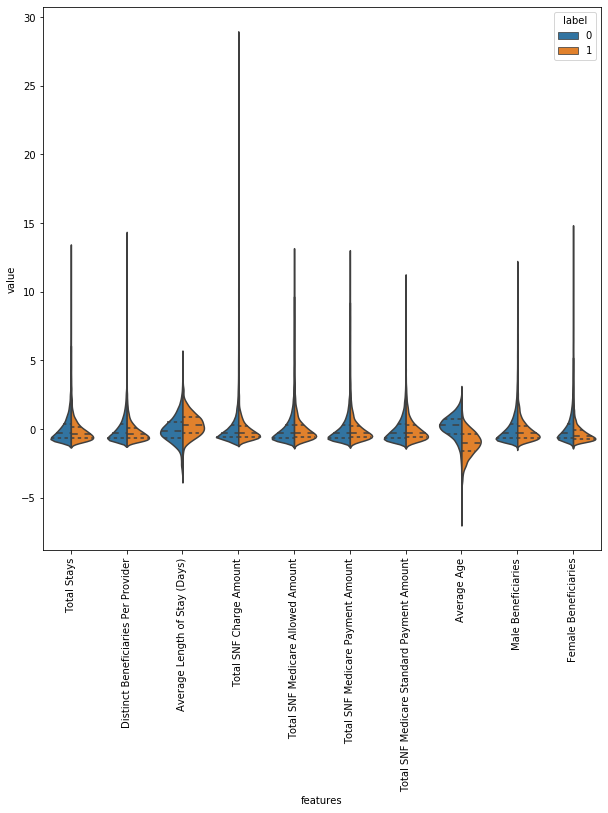

In [53]:
# first ten features
data_label = data.iloc[:,-1]
data_features = data.iloc[:, :-1]
data_scale = (data_features - data_features.mean()) / (data_features.std())              # standardization
data1 = pd.concat([data_label,data_scale.iloc[:,0:10]],axis=1)
data1 = pd.melt(data1,id_vars="label",
                    var_name="features",
                    value_name="value")
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="label", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

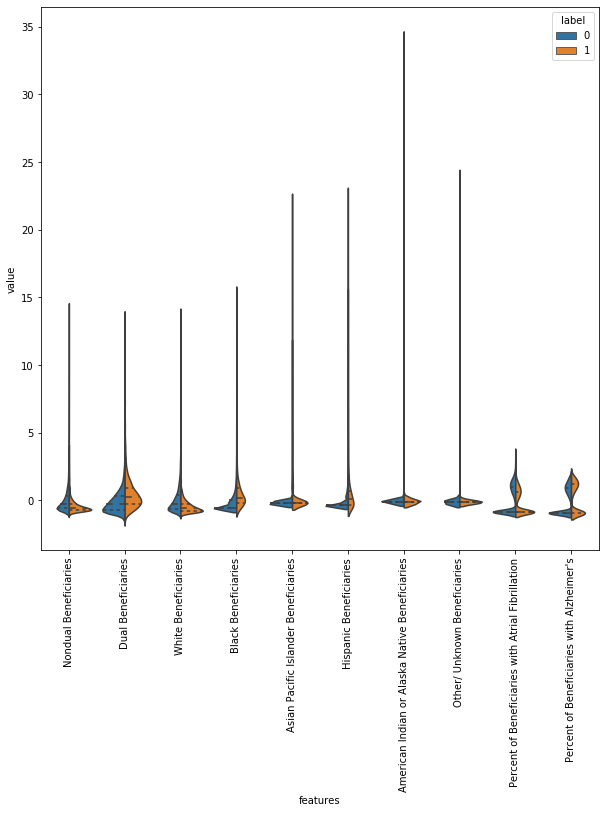

In [54]:
# Second ten features
data2 = pd.concat([data_label,data_scale.iloc[:,10:20]],axis=1)
data2 = pd.melt(data2,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="label", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

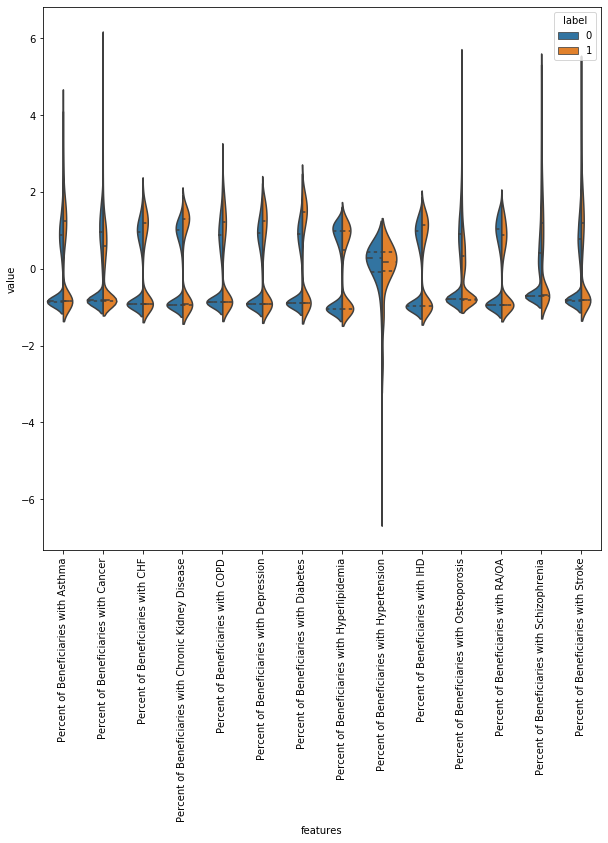

In [55]:
data3 = pd.concat([data_label,data_scale.iloc[:,20:35]],axis=1)
data3 = pd.melt(data3,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="label", data=data3,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

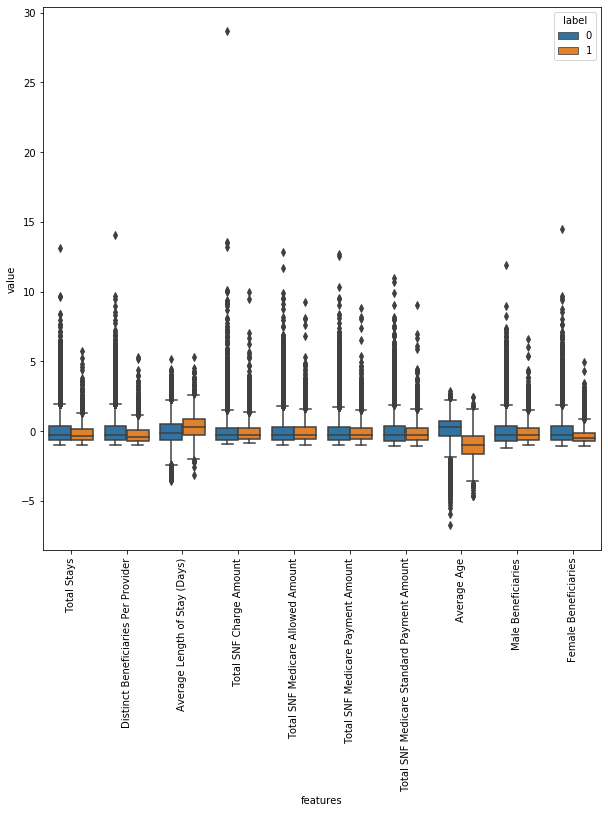

In [19]:
data1 = pd.concat([data_label,data_scale.iloc[:,0:10]],axis=1)
data1 = pd.melt(data,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="label", data=data)
plt.xticks(rotation=90)

In [19]:
data_scale = (x - x.mean()) / (x.std()) 

In [20]:
data = pd.concat([data_scale,y],axis=1)

In [21]:
data

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,...,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,label
0,-0.472825,-0.387588,-1.907632,0.232729,-0.775773,-0.711677,-0.702621,-0.133231,-0.533615,-0.444577,...,1.057977,0.953260,1.273942,NaN,0.891670,0.524053,1.553044,0.118541,-0.132169,0
1,-0.963061,-0.915388,-2.367095,-0.776309,-0.988479,-0.949479,-1.015355,0.722383,NaN,NaN,...,-0.129413,1.284663,0.770945,NaN,1.543704,0.714920,1.239031,0.503553,1.289681,0
2,-0.021808,0.084234,-1.698785,0.870794,-0.586276,-0.496029,-0.420009,-0.347134,-0.236669,0.108731,...,0.674948,1.160387,1.211068,NaN,1.131893,0.714920,1.134360,0.041539,0.477195,0
3,-0.283267,-0.187663,-1.615247,-0.080245,-0.640919,-0.553273,-0.497188,0.080673,-0.406352,-0.210958,...,0.368525,0.663282,1.179630,NaN,0.994623,0.428620,1.657715,0.426551,0.781877,0
4,-0.505507,-0.387588,-1.420323,-0.402051,-0.720108,-0.663419,-0.663570,-0.561037,-0.469984,-0.481464,...,0.598342,1.408939,0.991006,NaN,0.548495,0.237753,1.099469,0.118541,1.188120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15021,-0.413997,-0.379591,-0.515320,-0.482070,-0.475569,-0.466590,-0.495657,0.294576,-0.597247,-0.395394,...,-0.908833,-0.895468,-1.030854,NaN,-0.974248,-0.796478,-0.934719,-0.716844,-0.815932,0
15022,-0.485898,-0.435570,0.139066,-0.314427,-0.432288,-0.433856,-0.444172,0.508480,-0.682089,-0.432281,...,-0.911472,-0.886760,NaN,NaN,1.166211,-0.784229,-0.934770,-0.720686,-0.816097,0
15023,-0.708138,-0.707467,-0.557090,-0.529753,-0.675313,-0.647832,-0.697097,-0.561037,-0.915404,-0.715083,...,-0.909942,-0.884185,NaN,NaN,-0.974443,-0.799290,-0.938127,-0.713083,-0.820525,0
15024,-0.910769,-0.883400,-1.838017,-0.808486,-0.932835,-0.900207,-0.958827,1.150190,NaN,NaN,...,-0.917121,-0.891069,-1.031919,NaN,NaN,-0.812014,-0.936307,-0.718440,-0.829847,0


In [22]:
# Class count
count_class_0, count_class_1 = data.label.value_counts()

# Divide by class
df_class_0 = data[data['label'] == 0]
df_class_1 = data[data['label'] == 1]

Random under-sampling:
1    12715
0    12715
Name: label, dtype: int64


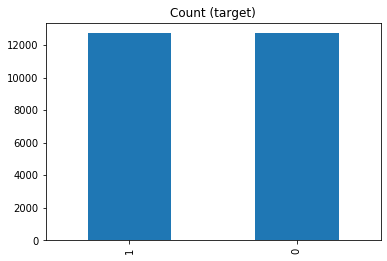

In [24]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_over.label.value_counts())

df_test_over.label.value_counts().plot(kind='bar', title='Count (target)');

In [26]:
df_test_over.fillna(0,inplace=True)

In [27]:
df_test_over.drop(['Distinct Beneficiaries Per Provider', 'Total SNF Medicare Payment Amount','Other/ Unknown Beneficiaries','Percent of Beneficiaries with Hypertension'],inplace=True, axis=1)

In [56]:
df_test_over.shape

(25430, 31)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_test_over.iloc[:,:-1], df_test_over.iloc[:,-1], test_size=0.2, random_state=0)

In [108]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
a=gb_clf.score(x_test, y_test)
b=gb_clf.score(x_train, y_train)

In [109]:
a

0.8843885174990169

In [84]:
b

0.8883700353912701

In [57]:
pre=gb_clf.predict(x_test)

In [60]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2558
           1       0.87      0.90      0.88      2528

    accuracy                           0.88      5086
   macro avg       0.88      0.88      0.88      5086
weighted avg       0.88      0.88      0.88      5086

